### Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Sphere Function

#### Implementing Sphere Function 

In [2]:
def sphere(x):
    return sum(x**2)

#### Implementing Adam Function

In [3]:
def adam(objective, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (
        bounds[:, 1] - bounds[:, 0]
    )
    score = objective(x)

    m = np.zeros(bounds.shape[0])
    v = np.zeros(bounds.shape[0])

    path = [x.copy()]

    for t in range(n_iter):
        g = 2 * x

        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i] ** 2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1 ** (t + 1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2 ** (t + 1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)

        score = objective(x)

        path.append(x.copy())

        print(">%d f(%s) = %.5f" % (t, x, score))

    return x, score, path


np.random.seed(1)


bounds = np.array([[-5.0, 5.0], [-5.0, 5.0]])

# Defining Hyperparameters
alpha = 0.001
beta1 = 0.9
beta2 = 0.999
n_iter = 5300

best, score, path = adam(sphere, bounds, n_iter, alpha, beta1, beta2)
print("Done!")
print("f(%s) = %f" % (best, score))

>0 f([-0.82877995  2.20224493]) = 5.53676
>1 f([-0.82777998  2.20124495]) = 5.53070
>2 f([-0.82678007  2.20024498]) = 5.52464
>3 f([-0.82578023  2.19924504]) = 5.51859
>4 f([-0.82478048  2.19824513]) = 5.51254
>5 f([-0.82378085  2.19724527]) = 5.50650
>6 f([-0.82278135  2.19624546]) = 5.50046
>7 f([-0.82178201  2.1952457 ]) = 5.49443
>8 f([-0.82078284  2.19424602]) = 5.48840
>9 f([-0.81978387  2.1932464 ]) = 5.48238
>10 f([-0.81878512  2.19224687]) = 5.47636
>11 f([-0.81778659  2.19124742]) = 5.47034
>12 f([-0.81678832  2.19024807]) = 5.46433
>13 f([-0.81579032  2.18924881]) = 5.45832
>14 f([-0.81479261  2.18824967]) = 5.45232
>15 f([-0.8137952   2.18725063]) = 5.44633
>16 f([-0.81279811  2.18625172]) = 5.44034
>17 f([-0.81180135  2.18525293]) = 5.43435
>18 f([-0.81080495  2.18425427]) = 5.42837
>19 f([-0.80980891  2.18325575]) = 5.42240
>20 f([-0.80881325  2.18225736]) = 5.41643
>21 f([-0.80781799  2.18125913]) = 5.41046
>22 f([-0.80682314  2.18026105]) = 5.40450
>23 f([-0.8058287   2

#### 2-D Contour Plot

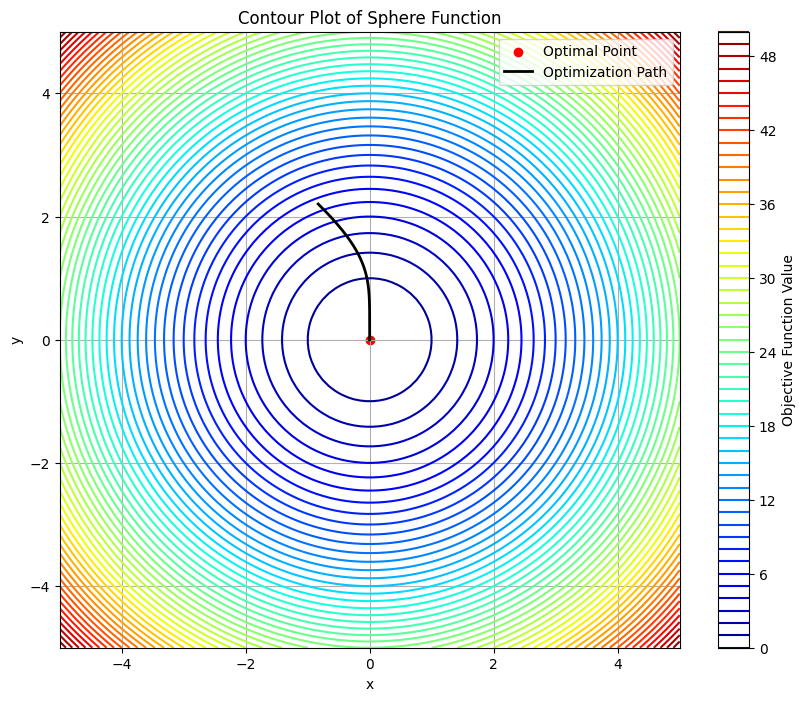

In [4]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap="jet")
plt.colorbar(label="Objective Function Value")
plt.title("Contour Plot of Sphere Function")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(best[0], best[1], color="red", label="Optimal Point")
plt.plot(
    [p[0] for p in path],
    [p[1] for p in path],
    color="black",
    linewidth=2,
    label="Optimization Path",
)
plt.legend()
plt.grid(True)
plt.show()

#### 3D Contour Plot

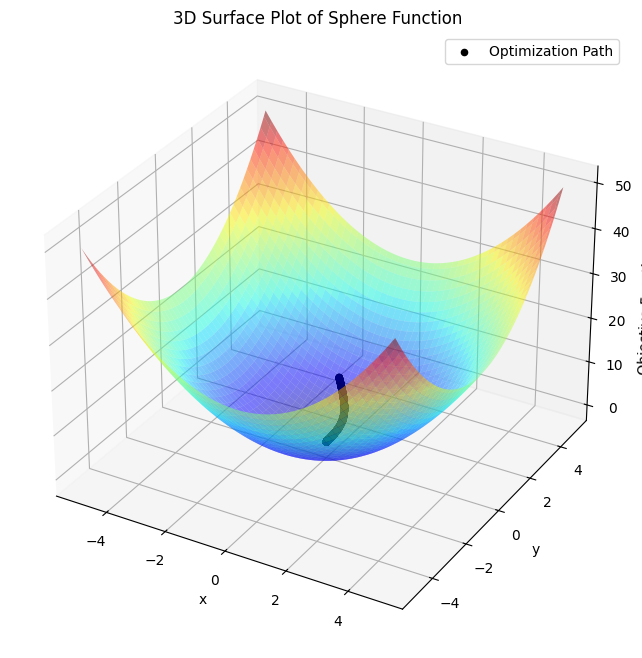

In [5]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="jet", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Objective Function Value")
ax.set_title("3D Surface Plot of Sphere Function")
path = np.array(path)
ax.scatter(
    path[:, 0],
    path[:, 1],
    sphere(path.T),
    color="black",
    label="Optimization Path",
)
ax.legend()

plt.show()

### Ackley Function

#### Implementing Ackley Function

In [6]:
def ackley(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = sum([(xi**2) for xi in x])
    sum2 = sum([np.cos(c * xi) for xi in x])
    return (
        -a * np.exp(-b * np.sqrt(sum1 / n)) - np.exp(sum2 / n) + a + np.exp(1)
    )


def ackley_derivative(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = sum([(xi**2) for xi in x])
    sum2 = sum([np.cos(c * xi) for xi in x])
    grad = np.zeros_like(x)
    for i in range(len(x)):
        grad[i] = (
            2 * a * b * np.exp(-b * np.sqrt(sum1 / n)) * (x[i] / np.sqrt(n))
        ) + (sum([np.sin(c * xi) for xi in x]) / n)
    return grad

#### Implementing Adam on Ackley Function

In [7]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (
        bounds[:, 1] - bounds[:, 0]
    )
    score = objective(x)

    m = np.zeros(bounds.shape[0])
    v = np.zeros(bounds.shape[0])

    path = [x.copy()]

    for t in range(n_iter):
        g = derivative(x)

        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i] ** 2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1 ** (t + 1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2 ** (t + 1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)

        score = objective(x)

        path.append(x.copy())

        print(">%d f(%s) = %.5f" % (t, x, score))

    return x, score, path


np.random.seed(1)

bounds = np.array([[-5.0, 5.0], [-5.0, 5.0]])

alpha = 0.001
beta1 = 0.9
beta2 = 0.999

n_iter = 10000

print("Running Adam optimizer for Ackley function...")
best_ackley, score_ackley, path = adam(
    ackley, ackley_derivative, bounds, n_iter, alpha, beta1, beta2
)
print("Ackley function optimization done!")
print("Optimal point (Ackley):", best_ackley)
print("Optimal value (Ackley):", score_ackley)

Running Adam optimizer for Ackley function...
>0 f([-0.82877995  2.20224493]) = 6.90951
>1 f([-0.82778     2.20124494]) = 6.90657
>2 f([-0.82678011  2.20024495]) = 6.90364
>3 f([-0.82578033  2.19924498]) = 6.90073
>4 f([-0.82478067  2.19824502]) = 6.89785
>5 f([-0.82378116  2.19724508]) = 6.89499
>6 f([-0.82278183  2.19624516]) = 6.89215
>7 f([-0.82178271  2.19524527]) = 6.88933
>8 f([-0.82078382  2.1942454 ]) = 6.88653
>9 f([-0.81978518  2.19324558]) = 6.88376
>10 f([-0.81878681  2.19224579]) = 6.88100
>11 f([-0.81778874  2.19124604]) = 6.87827
>12 f([-0.81679099  2.19024634]) = 6.87556
>13 f([-0.81579358  2.18924668]) = 6.87287
>14 f([-0.81479652  2.18824708]) = 6.87020
>15 f([-0.81379984  2.18724754]) = 6.86756
>16 f([-0.81280355  2.18624806]) = 6.86493
>17 f([-0.81180767  2.18524865]) = 6.86233
>18 f([-0.8108122  2.1842493]) = 6.85975
>19 f([-0.80981718  2.18325003]) = 6.85718
>20 f([-0.8088226   2.18225084]) = 6.85464
>21 f([-0.80782848  2.18125173]) = 6.85212
>22 f([-0.80683483  

#### 2D Plotting of Contour Plot of Ackley Function

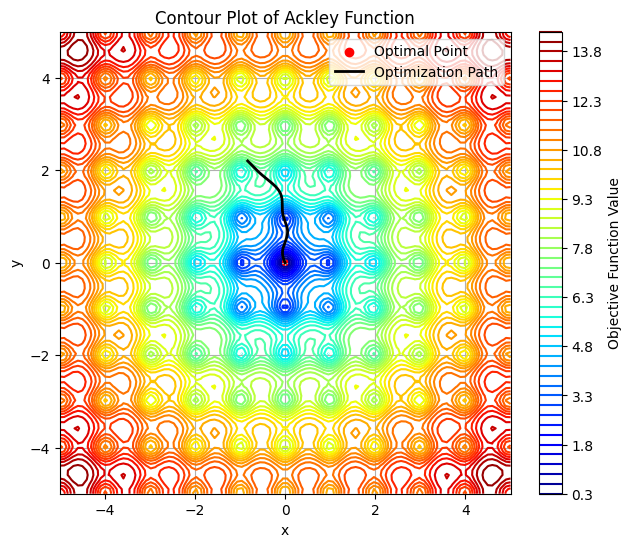

In [8]:
x_ackley = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y_ackley = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X_ackley, Y_ackley = np.meshgrid(x_ackley, y_ackley)
Z_ackley = ackley(np.vstack([X_ackley.ravel(), Y_ackley.ravel()])).reshape(
    X_ackley.shape
)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.contour(X_ackley, Y_ackley, Z_ackley, levels=50, cmap="jet")
plt.colorbar(label="Objective Function Value")
plt.title("Contour Plot of Ackley Function")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(best_ackley[0], best_ackley[1], color="red", label="Optimal Point")
path_ackley = np.array(path)
plt.plot(
    path_ackley[:, 0],
    path_ackley[:, 1],
    color="black",
    linewidth=2,
    label="Optimization Path",
)
plt.legend()
plt.grid(True)
plt.show()

#### 3D Contour Plot of Ackley Function

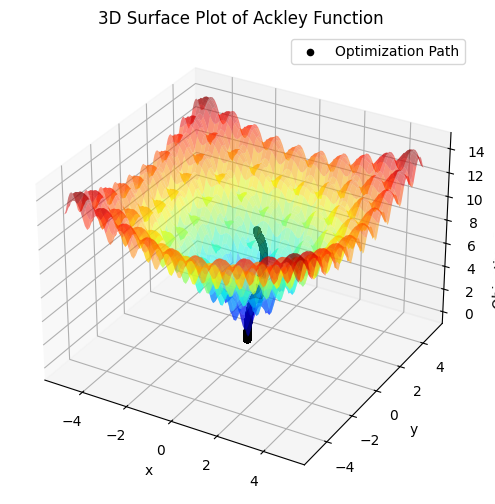

In [9]:
x_ackley = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y_ackley = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X_ackley, Y_ackley = np.meshgrid(x_ackley, y_ackley)
Z_ackley = ackley(np.vstack([X_ackley.ravel(), Y_ackley.ravel()])).reshape(
    X_ackley.shape
)

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(X_ackley, Y_ackley, Z_ackley, cmap="jet", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Objective Function Value")
ax.set_title("3D Surface Plot of Ackley Function")
path_ackley = np.array(path_ackley)
ax.scatter(
    path_ackley[:, 0],
    path_ackley[:, 1],
    ackley(path_ackley.T),
    color="black",
    label="Optimization Path",
)
ax.legend()

plt.show()

### Rosenbrock Function

#### Implementing Rosenbrock Function

In [10]:
def rosenbrock(x):
    return sum(100.0 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2)


def rosenbrock_derivative(x):
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0])
    grad[1:-1] = (
        200 * (x[1:-1] - x[:-2] ** 2)
        - 400 * x[1:-1] * (x[2:] - x[1:-1] ** 2)
        - 2 * (1 - x[1:-1])
    )
    grad[-1] = 200 * (x[-1] - x[-2] ** 2)
    return grad

#### Implementing Adam for Rosenbrock Function

In [11]:
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    x = bounds[:, 0] + np.random.rand(len(bounds)) * (
        bounds[:, 1] - bounds[:, 0]
    )
    score = objective(x)

    m = np.zeros(bounds.shape[0])
    v = np.zeros(bounds.shape[0])

    path = [x.copy()]

    for t in range(n_iter):
        g = derivative(x)

        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i] ** 2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1 ** (t + 1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2 ** (t + 1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (np.sqrt(vhat) + eps)

        path.append(x.copy())

        score = objective(x)

        print(">%d f(%s) = %.5f" % (t, x, score))

    return x, score, path


np.random.seed(1)

bounds = np.array([[-2.0, 2.0], [-2.0, 2.0]])

alpha = 0.001
beta1 = 0.9
beta2 = 0.999

n_iter = 12650

best, score, path = adam(
    rosenbrock, rosenbrock_derivative, bounds, n_iter, alpha, beta1, beta2
)
print("Done!")
print("f(%s) = %f" % (best, score))

>0 f([-0.33291198  0.88029797]) = 60.98469
>1 f([-0.333912    0.87929803]) = 60.73113
>2 f([-0.33491206  0.87829818]) = 60.47783
>3 f([-0.33591217  0.87729847]) = 60.22480
>4 f([-0.33691234  0.87629892]) = 59.97204
>5 f([-0.33791259  0.87529959]) = 59.71956
>6 f([-0.33891292  0.8743005 ]) = 59.46738
>7 f([-0.33991335  0.87330169]) = 59.21548
>8 f([-0.34091389  0.87230321]) = 58.96389
>9 f([-0.34191455  0.87130508]) = 58.71260
>10 f([-0.34291533  0.87030734]) = 58.46162
>11 f([-0.34391625  0.86931003]) = 58.21096
>12 f([-0.34491732  0.86831319]) = 57.96063
>13 f([-0.34591854  0.86731683]) = 57.71063
>14 f([-0.34691991  0.86632101]) = 57.46096
>15 f([-0.34792145  0.86532575]) = 57.21163
>16 f([-0.34892316  0.86433108]) = 56.96265
>17 f([-0.34992503  0.86333703]) = 56.71402
>18 f([-0.35092709  0.86234364]) = 56.46575
>19 f([-0.35192933  0.86135093]) = 56.21785
>20 f([-0.35293174  0.86035893]) = 55.97031
>21 f([-0.35393434  0.85936766]) = 55.72315
>22 f([-0.35493713  0.85837716]) = 55.4763

#### 2D Plot of Rosenbrock Function 

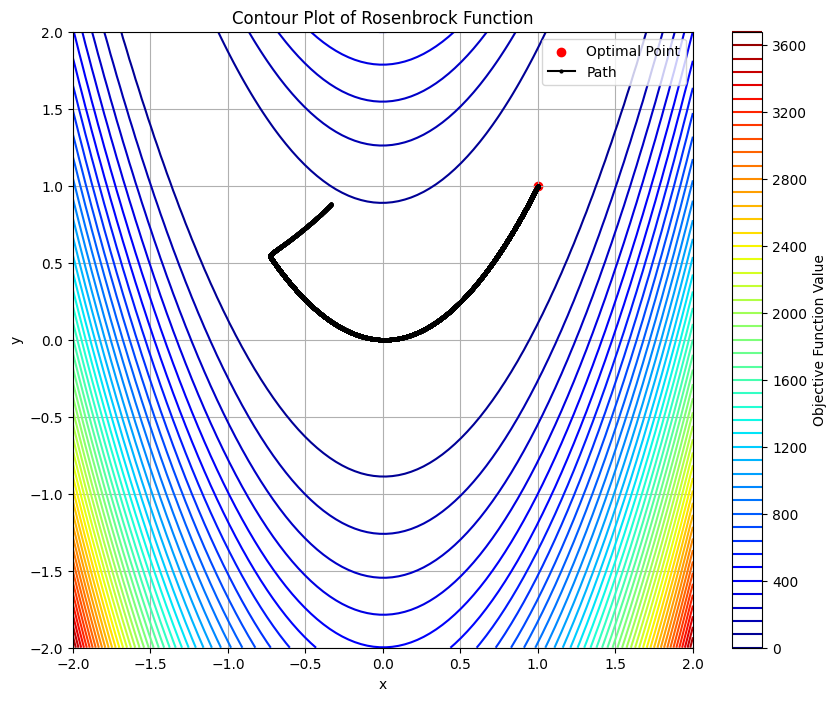

In [12]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap="jet")
plt.colorbar(label="Objective Function Value")
plt.title("Contour Plot of Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(best[0], best[1], color="red", label="Optimal Point")
plt.plot(
    [p[0] for p in path],
    [p[1] for p in path],
    marker="o",
    markersize=2,
    color="black",
    label="Path",
)
plt.legend()
plt.grid(True)
plt.show()

#### 3D Contour Plot for Rosenbrock Function

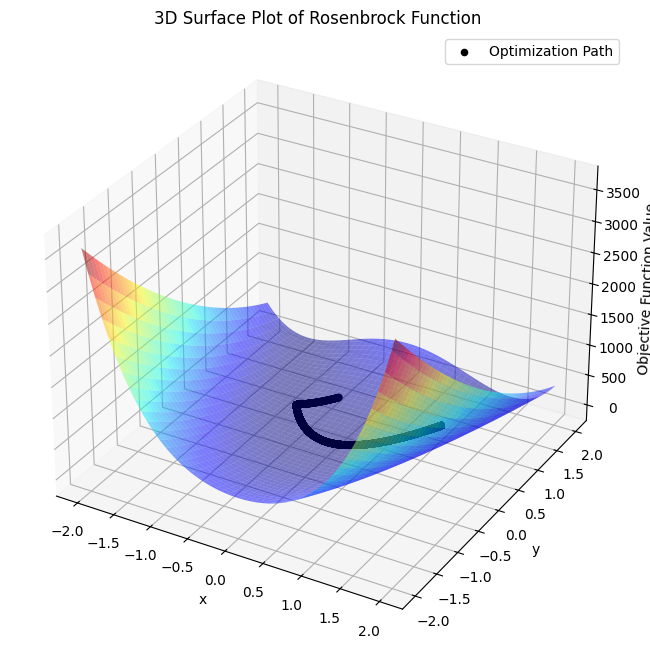

In [13]:
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="jet", alpha=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Objective Function Value")
ax.set_title("3D Surface Plot of Rosenbrock Function")

path = np.array(path)
ax.scatter(
    path[:, 0],
    path[:, 1],
    rosenbrock(path.T),
    color="black",
    label="Optimization Path",
)
ax.legend()

plt.show()